**Importing libraries**

In [128]:
import numpy as np
import random
from tqdm import tqdm
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import KFold, cross_validate
import matplotlib.pyplot as plt

**Reading data**

In [130]:
data = pd.read_csv("24_train_1.csv")
data

,ArticleId,Text,Category
0,1429,sfa awaits report over mikoliunas the scottish...,sport
1,1896,parmalat to return to stockmarket parmalat th...,business
2,1633,edu blasts arsenal arsenal s brazilian midfiel...,sport
3,2178,henman decides to quit davis cup tim henman ha...,sport
4,194,french suitor holds lse meeting european stock...,business
...,...,...,...
995,1250,blair damaged by blunkett row a majority of ...,politics
996,1639,a november to remember last saturday one news...,sport
997,916,highbury tunnel players in clear the football ...,sport
998,2217,top stars join us tsunami tv show brad pitt r...,entertainment


**Reading Test data**

In [131]:
test_data = pd.read_csv("news-test.csv")
test_data

,ArticleId,Text
0,1018,qpr keeper day heads for preston queens park r...
1,1319,software watching while you work software that...
2,1138,d arcy injury adds to ireland woe gordon d arc...
3,459,india s reliance family feud heats up the ongo...
4,1020,boro suffer morrison injury blow middlesbrough...
...,...,...
730,1923,eu to probe alitalia state aid the european ...
731,373,u2 to play at grammy awards show irish rock ba...
732,1704,sport betting rules in spotlight a group of mp...
733,206,alfa romeos to get gm engines fiat is to sto...


**Generating Tf-IDF matrix**

In [132]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

nltk.download('stopwords')
nltk.download('wordnet')

# Preprocessing function
def preprocess_text(text):
    # Lowercase
    text = text.lower()
    # Removing punctuation/special characters
    text = ''.join([char for char in text if char.isalnum() or char == ' '])
    # Tokenizing and remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in text.split() if word not in stop_words]
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(tokens)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


**Generating TF-IDF matrix for training**

In [133]:
# Applying preprocessing on training data
data['Preprocessed_Text'] = data['Text'].apply(preprocess_text)

# Feature extraction with TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # Adjust max_features as needed
features = tfidf_vectorizer.fit_transform(data['Preprocessed_Text']).toarray()

In [134]:
# Printing the data
data

,ArticleId,Text,Category,Preprocessed_Text
0,1429,sfa awaits report over mikoliunas the scottish...,sport,sfa awaits report mikoliunas scottish football...
1,1896,parmalat to return to stockmarket parmalat th...,business,parmalat return stockmarket parmalat italian d...
2,1633,edu blasts arsenal arsenal s brazilian midfiel...,sport,edu blast arsenal arsenal brazilian midfielder...
3,2178,henman decides to quit davis cup tim henman ha...,sport,henman decides quit davis cup tim henman retir...
4,194,french suitor holds lse meeting european stock...,business,french suitor hold lse meeting european stock ...
...,...,...,...,...
995,1250,blair damaged by blunkett row a majority of ...,politics,blair damaged blunkett row majority voter 68 b...
996,1639,a november to remember last saturday one news...,sport,november remember last saturday one newspaper ...
997,916,highbury tunnel players in clear the football ...,sport,highbury tunnel player clear football associat...
998,2217,top stars join us tsunami tv show brad pitt r...,entertainment,top star join u tsunami tv show brad pitt robe...


In [135]:
# Printing the TF-IDF matrix
features

array([[0.04606308, 0.05233383, 0.        , ..., 0.06728107, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.07080656, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.04335269, 0.        ,
        0.        ]])

**Running Decision tree classifiers on gini and entropy criteria**

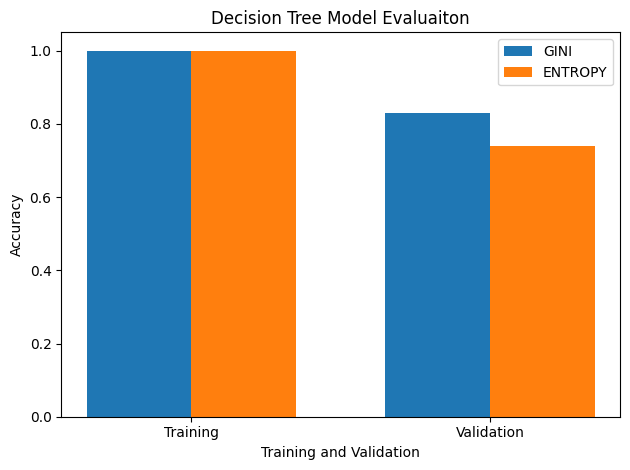

In [136]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from joblib import dump

# Assuming `features` is the TF-IDF or BoW matrix and `df['Category']` are the labels
X = features  # The features extracted in the preprocessing step
y = data['Category'].values  # The target categories

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Defining the criteria to evaluate
criteria = ["gini", "entropy"]
train_accuracies = []
val_accuracies = []

# Training and evaluating a Decision Tree model for each criterion
for criterion in criteria:
    decision_tree_model = DecisionTreeClassifier(criterion=criterion, random_state=42)
    decision_tree_model.fit(X_train, y_train)


    # Evaluating on training set
    train_preds = decision_tree_model.predict(X_train)
    train_accuracy = accuracy_score(y_train, train_preds)
    train_accuracies.append(train_accuracy)

    # Evaluating on validation set
    val_preds = decision_tree_model.predict(X_test)
    val_accuracy = accuracy_score(y_test, val_preds)
    val_accuracies.append(val_accuracy)

width = 0.35
bar_pos = np.arange(len(criteria))

fig, ax = plt.subplots()
ax.bar(bar_pos, [train_accuracies[0], val_accuracies[0]], width, label='GINI')
ax.bar(bar_pos+width, [train_accuracies[1], val_accuracies[1]], width, label='ENTROPY')

ax.set_xlabel("Training and Validation")
ax.set_ylabel('Accuracy')
ax.set_title('Decision Tree Model Evaluaiton')
ax.set_xticks(bar_pos+width/2, ["Training", "Validation"])
ax.legend()

fig.tight_layout()

plt.show()


**Generating decision tree classifiers for various min_sample_leaf values**

In [137]:
# Defining the range of `min_samples_leaf` to evaluate
min_samples_leaf_values = [i for i in range(1, 202, 10)]  # Extend this list with the values you want to test

# Initializing a DataFrame to store the results
results = pd.DataFrame(columns=['min_samples_leaf', 'mean_train_accuracy', 'std_train_accuracy', 'mean_val_accuracy', 'std_val_accuracy'])

# Performing 5-fold cross-validation for each value of min_samples_leaf
kf = KFold(n_splits=5, shuffle=True, random_state=42)
for min_samples_leaf in min_samples_leaf_values:
    decision_tree_leaf_values_model = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf, random_state=42)
    cv_results = cross_validate(decision_tree_leaf_values_model, X, y, cv=kf, return_train_score=True)

    # Storing the results
    new_row = pd.DataFrame({
    'min_samples_leaf': [min_samples_leaf],
    'mean_train_accuracy': [np.mean(cv_results['train_score'])],
    'std_train_accuracy': [np.std(cv_results['train_score'])],
    'mean_val_accuracy': [np.mean(cv_results['test_score'])],
    'std_val_accuracy': [np.std(cv_results['test_score'])]})

    # Using concat to add the new row to the existing DataFrame
    results = pd.concat([results, new_row], ignore_index=True)

# Printing the results
results

,min_samples_leaf,mean_train_accuracy,std_train_accuracy,mean_val_accuracy,std_val_accuracy
0,1,1.00000,0.000000,0.805,0.036194
1,11,0.85325,0.002806,0.769,0.037336
2,21,0.79450,0.014089,0.729,0.037603
3,31,0.76450,0.006828,0.719,0.026907
4,41,0.73475,0.012410,0.673,0.027677
5,51,0.71325,0.010112,0.662,0.032031
6,61,0.71150,0.011275,0.668,0.038288
7,71,0.67225,0.026094,0.639,0.043635
8,81,0.64000,0.023979,0.612,0.029933
9,91,0.58500,0.041322,0.550,0.046690


**Generating the plot**

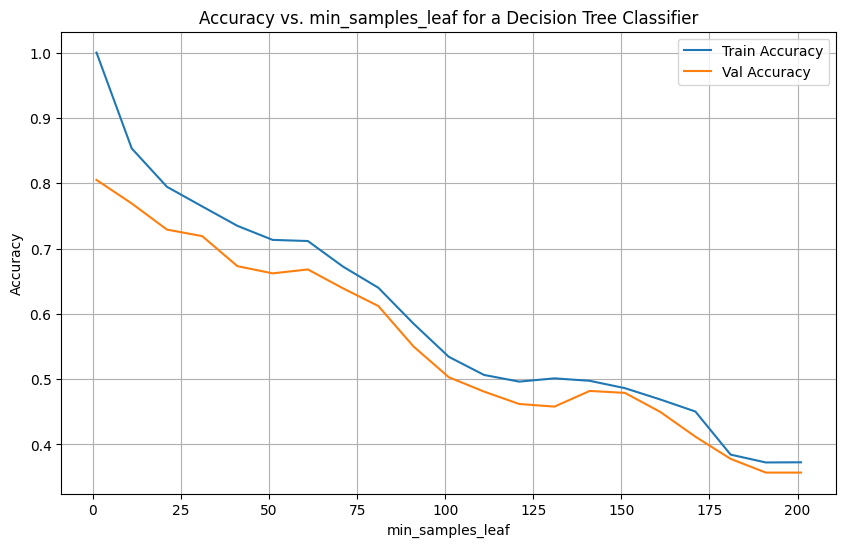

In [138]:
# Plotting the figure
plt.figure(figsize=(10, 6))
plt.plot(results['min_samples_leaf'], results['mean_train_accuracy'], label='Train Accuracy')
plt.plot(results['min_samples_leaf'], results['mean_val_accuracy'], label='Val Accuracy')
plt.xlabel('min_samples_leaf')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. min_samples_leaf for a Decision Tree Classifier')
plt.legend()
plt.grid(True)
plt.show()

**Generating decision tree classifiers for various max_features values**

In [139]:
# Defining the range of max_features values to test
max_features_values = [None, 'sqrt', 'log2'] + [i for i in range(10, 1001, 50)]  # Plus any specific integers or fractions you're interested in

# Initializing a DataFrame to store the results
results_max_features = pd.DataFrame(columns=['max_features', 'mean_train_accuracy', 'std_train_accuracy', 'mean_val_accuracy', 'std_val_accuracy'])

# Performing 5-fold cross-validation for each value of max_features
kf = KFold(n_splits=5, shuffle=True, random_state=42)
for max_feature in max_features_values:
    decision_tree_max_features_model = DecisionTreeClassifier(max_features=max_feature, random_state=42)
    cv_results = cross_validate(decision_tree_max_features_model, X, y, cv=kf, return_train_score=True)

    # Creating a new DataFrame for the row you wish to append
    new_row = pd.DataFrame({
        'max_features': [max_feature],
        'mean_train_accuracy': [np.mean(cv_results['train_score'])],
        'std_train_accuracy': [np.std(cv_results['train_score'])],
        'mean_val_accuracy': [np.mean(cv_results['test_score'])],
        'std_val_accuracy': [np.std(cv_results['test_score'])]
    })

    # Using concat to add the new row to the existing DataFrame
    results_max_features = pd.concat([results_max_features, new_row], ignore_index=True)

# Printing the results
results_max_features


,max_features,mean_train_accuracy,std_train_accuracy,mean_val_accuracy,std_val_accuracy
0,None,1.0,0.0,0.805,0.036194
1,sqrt,1.0,0.0,0.747,0.030265
2,log2,1.0,0.0,0.604,0.025768
3,10,1.0,0.0,0.692,0.025020
4,60,1.0,0.0,0.747,0.053160
5,110,1.0,0.0,0.765,0.019235
6,160,1.0,0.0,0.748,0.019131
7,210,1.0,0.0,0.791,0.006633
8,260,1.0,0.0,0.799,0.013928
9,310,1.0,0.0,0.800,0.025495


**Plotting the figure**

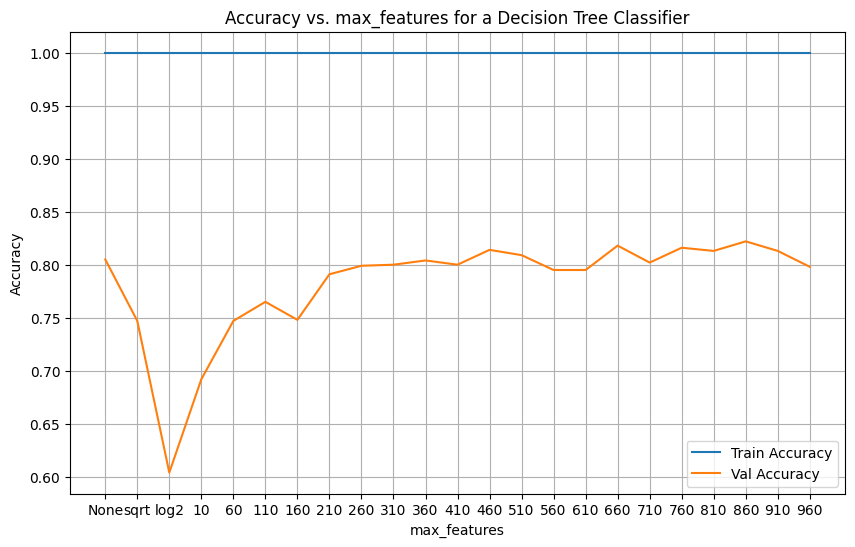

In [140]:
# Plotting the figure
plt.figure(figsize=(10, 6))
results_max_features['max_features'] = [str(max_features) if max_features is not None else 'None' for max_features in results_max_features['max_features']]
plt.plot(results_max_features['max_features'], results_max_features['mean_train_accuracy'], label='Train Accuracy')
plt.plot(results_max_features['max_features'], results_max_features['mean_val_accuracy'], label='Val Accuracy')
plt.xlabel('max_features')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. max_features for a Decision Tree Classifier')
plt.legend()
plt.grid(True)
plt.show()

**Generating Random Forest classifiers for various n_estimator values**

In [141]:
from sklearn.ensemble import RandomForestClassifier

# Defining the range of n_estimators values to test
n_estimators_values = [i for i in range(10, 201, 10)]

# Initializing a DataFrame to store the results
results_rf = pd.DataFrame(columns=['n_estimators', 'mean_train_accuracy', 'std_train_accuracy', 'mean_val_accuracy', 'std_val_accuracy'])

# Performing 5-fold cross-validation for each value of n_estimators
kf = KFold(n_splits=5, shuffle=True, random_state=42)
for n_estimators in n_estimators_values:
    random_forest_model = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    cv_results = cross_validate(random_forest_model, X_train, y_train, cv=kf, return_train_score=True)

    # Appending results to the DataFrame
    new_row = pd.DataFrame({
        'n_estimators': [n_estimators],
        'mean_train_accuracy': [np.mean(cv_results['train_score'])],
        'std_train_accuracy': [np.std(cv_results['train_score'])],
        'mean_val_accuracy': [np.mean(cv_results['test_score'])],
        'std_val_accuracy': [np.std(cv_results['test_score'])]
    })

    results_rf = pd.concat([results_rf, new_row], ignore_index=True)

# Displaying the results
results_rf


,n_estimators,mean_train_accuracy,std_train_accuracy,mean_val_accuracy,std_val_accuracy
0,10,0.999062,0.000765,0.90375,0.028940
1,20,1.000000,0.000000,0.93125,0.012500
2,30,1.000000,0.000000,0.94000,0.015104
3,40,1.000000,0.000000,0.93250,0.016489
4,50,1.000000,0.000000,0.94500,0.018286
5,60,1.000000,0.000000,0.94125,0.015104
6,70,1.000000,0.000000,0.93875,0.018286
7,80,1.000000,0.000000,0.94125,0.018792
8,90,1.000000,0.000000,0.94000,0.015612
9,100,1.000000,0.000000,0.94250,0.018708


**Plotting the figure**

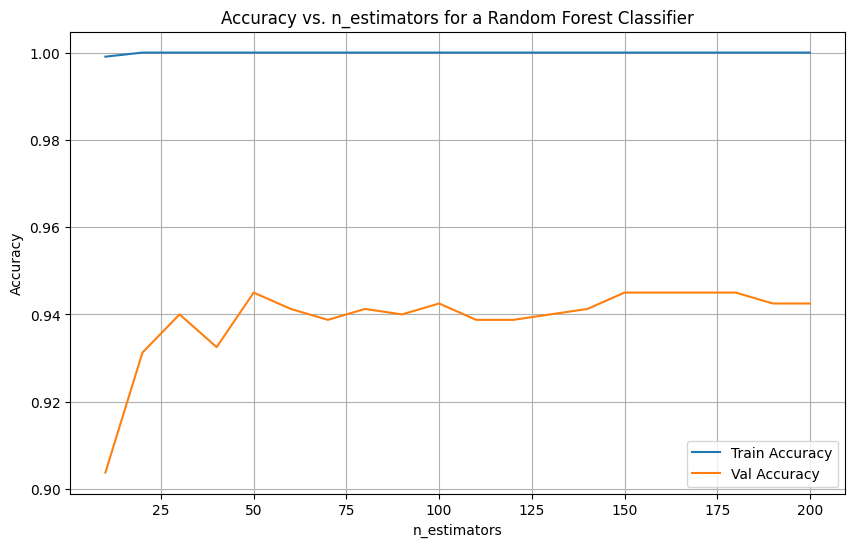

In [142]:
# Plotting the figure
plt.figure(figsize=(10, 6))
plt.plot(results_rf['n_estimators'], results_rf['mean_train_accuracy'], label='Train Accuracy')
plt.plot(results_rf['n_estimators'], results_rf['mean_val_accuracy'], label='Val Accuracy')
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. n_estimators for a Random Forest Classifier')
plt.legend()
plt.grid(True)
plt.show()

**Generating Random Forest clssifiers for various min_samples_leaf values**

In [143]:
# Defining the range of min_samples_leaf values to test
min_samples_leaf_values = [i for i in range(1, 21, 1)]

# Initializing a DataFrame to store the results
results_min_samples_leaf = pd.DataFrame(columns=['min_samples_leaf', 'mean_train_accuracy', 'std_train_accuracy', 'mean_val_accuracy', 'std_val_accuracy'])

# Performing 5-fold cross-validation for each min_samples_leaf value
kf = KFold(n_splits=5, shuffle=True, random_state=42)
for min_samples_leaf in min_samples_leaf_values:
    random_forest_leaf_model = RandomForestClassifier(min_samples_leaf=min_samples_leaf, random_state=42)
    cv_results = cross_validate(random_forest_leaf_model, X_train, y_train, cv=kf, return_train_score=True)

    # Appending results to the DataFrame
    new_row = pd.DataFrame({
        'min_samples_leaf': [min_samples_leaf],
        'mean_train_accuracy': [np.mean(cv_results['train_score'])],
        'std_train_accuracy': [np.std(cv_results['train_score'])],
        'mean_val_accuracy': [np.mean(cv_results['test_score'])],
        'std_val_accuracy': [np.std(cv_results['test_score'])]
    })

    results_min_samples_leaf = pd.concat([results_min_samples_leaf, new_row], ignore_index=True)

# Displaying the results
results_min_samples_leaf


,min_samples_leaf,mean_train_accuracy,std_train_accuracy,mean_val_accuracy,std_val_accuracy
0,1,1.000000,0.000000,0.94250,0.018708
1,2,0.999687,0.000625,0.93750,0.019365
2,3,0.997812,0.001250,0.93250,0.026041
3,4,0.993750,0.001712,0.93000,0.023184
4,5,0.991562,0.001593,0.93125,0.018957
5,6,0.983125,0.003187,0.92500,0.016298
6,7,0.977500,0.004698,0.92250,0.019605
7,8,0.974687,0.003750,0.92125,0.024875
8,9,0.968125,0.005000,0.91250,0.020917
9,10,0.962187,0.007355,0.91500,0.021506


**Plotting the figure**

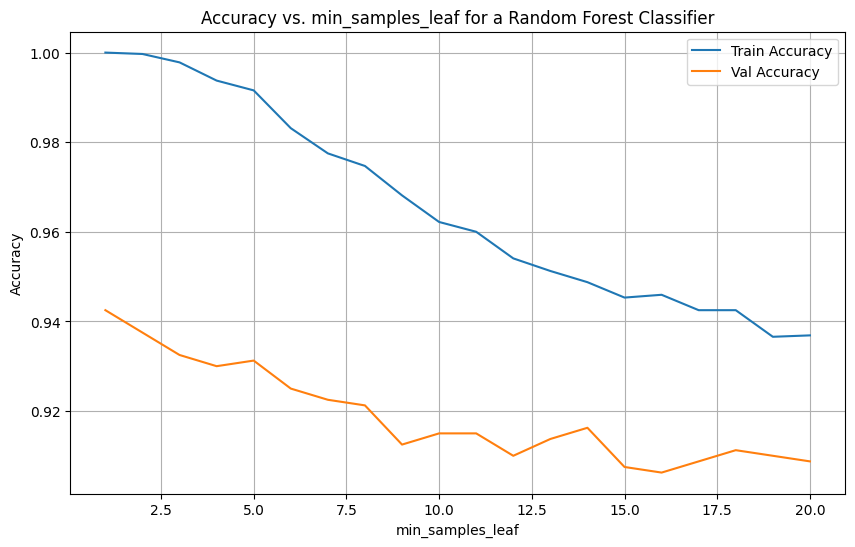

In [144]:
plt.figure(figsize=(10, 6))
plt.plot(results_min_samples_leaf['min_samples_leaf'], results_min_samples_leaf['mean_train_accuracy'], label='Train Accuracy')
plt.plot(results_min_samples_leaf['min_samples_leaf'], results_min_samples_leaf['mean_val_accuracy'], label='Val Accuracy')
plt.xlabel('min_samples_leaf')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. min_samples_leaf for a Random Forest Classifier')
plt.legend()
plt.grid(True)
plt.show()

**Generating Tf-IDF matrix for test data**

In [145]:
# Applying preprocessing
test_data['Preprocessed_Text'] = test_data['Text'].apply(preprocess_text)

# Featuring extraction with TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # Adjust max_features as needed
test_data_features = tfidf_vectorizer.fit_transform(test_data['Preprocessed_Text']).toarray()

In [146]:
test_data

,ArticleId,Text,Preprocessed_Text
0,1018,qpr keeper day heads for preston queens park r...,qpr keeper day head preston queen park ranger ...
1,1319,software watching while you work software that...,software watching work software monitor every ...
2,1138,d arcy injury adds to ireland woe gordon d arc...,arcy injury add ireland woe gordon arcy ruled ...
3,459,india s reliance family feud heats up the ongo...,india reliance family feud heat ongoing public...
4,1020,boro suffer morrison injury blow middlesbrough...,boro suffer morrison injury blow middlesbrough...
...,...,...,...
730,1923,eu to probe alitalia state aid the european ...,eu probe alitalia state aid european commissio...
731,373,u2 to play at grammy awards show irish rock ba...,u2 play grammy award show irish rock band u2 p...
732,1704,sport betting rules in spotlight a group of mp...,sport betting rule spotlight group mp peer cal...
733,206,alfa romeos to get gm engines fiat is to sto...,alfa romeo get gm engine fiat stop making sixc...


In [ ]:
# finalmodel = RandomForestClassifier(min_samples_leaf=1, n_estimators=200, random_state=42)
# finalmodel.fit(X_train, y_train)
# # Evaluate on training set
# val_preds = finalmodel.predict(X_test)
# val_accuracy = accuracy_score(y_test, val_preds)
# print(val_accuracy)

0.95


**Running the final model**

In [147]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score

# RandomForest model
final_model = RandomForestClassifier(min_samples_leaf=11, n_estimators=10, random_state=42)

# AdaBoost with RandomForest as the base estimator
ada_boost_model = AdaBoostClassifier(base_estimator=final_model, n_estimators=65, random_state=42)

# Fitting the AdaBoost model
ada_boost_model.fit(X_train, y_train)

# Evaluating on the test set
ada_val_preds = ada_boost_model.predict(X_test)
ada_val_accuracy = accuracy_score(y_test, ada_val_preds)

print(ada_val_accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


0.955


In [148]:
import csv

**Generating csv file**

In [152]:
predictions = ada_boost_model.predict(test_data_features)

# Create a DataFrame with predictions
predictions_df = pd.DataFrame(predictions, columns=['Predictions'])

# Add the ArticleId to the predictions DataFrame
predictions_df['ArticleId'] = test_data['ArticleId']

# Rearrange the columns so that ArticleId comes first
predictions_df = predictions_df[['ArticleId', 'Predictions']]

# Save the DataFrame to CSV without the header
predictions_df.to_csv('labels.csv', index=False, header=False)